# CHE1147H - Feature engineering A#4

In [1]:
import  pandas as pd 
import  numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

## 1 Chemical composition of pottery
You work for a pottery manufacturing company that produces two different types of products
A and B. Product A uses raw material from Llanedyrn and Product B uses raw material from
Isle Thorns and Ashley Rails1. Your company is informed that Llanedyrn will be closing
soon for maintenance and your entire production of product A is at risk.


You received a potential new source of raw material from site Caldicot and you analyzed
two samples to compare them to your existing samples from the other three sites. As
the new data scientist of the company you are asked to look into the data and give your
recommendation regarding the suitability of raw material from Caldicot as a replacement
for Llanedyrn.

The ask "look into the data" normally calls for an unsupervised learning exercise, since
there is no clear output you are asked to predict. You will investigate the multivariate chem-
ical composition of the raw material from four dierent sources using Principal Component
Analysis.

##### 1. Import and view the data. How many columns do you have? Which columns will you use in your PCA?

    How many columns do you have: 7
    Which columns will you use in your PCA: ['Al', 'Fe', 'Mg', 'Ca', 'Na']

In [2]:
# Import and view the data
pottery = pd.read_csv('Pottery.csv')
pottery 

,Unnamed: 0,Site,Al,Fe,Mg,Ca,Na
0,1,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,2,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,3,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,4,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,5,Llanedyrn,13.8,7.06,5.34,0.20,0.20
5,6,Llanedyrn,10.9,6.26,3.47,0.17,0.22
6,7,Llanedyrn,10.1,4.26,4.26,0.20,0.18
7,8,Llanedyrn,11.6,5.78,5.91,0.18,0.16
8,9,Llanedyrn,11.1,5.49,4.52,0.29,0.30
9,10,Llanedyrn,13.4,6.92,7.23,0.28,0.20


##### 2. Pre-process the data and perform PCA with 3 PCs.
    X = TP'
    X dimension: (26, 5)
    T dimension: (26, 3)
    P dimension: (5, 3)

In [3]:
# Drop unnecessary columns and reset index
pottery_clean = pottery.drop(["Unnamed: 0"], axis=1)
pottery_clean.set_index("Site", inplace=True)

# standardize data
scaler = StandardScaler()
pottery_scaled = scaler.fit_transform(pottery_clean)

In [4]:
# perform PCA with 3 PCs
pca = PCA(n_components=3, svd_solver='full')

# Extract the scores
PC_scores = pca.fit_transform(pottery_scaled)
scores_pd = pd.DataFrame(data = PC_scores
                         ,columns = ['PC1', 'PC2', 'PC3']
                         ,index = pottery.index)

# Extract the loadings
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3']
                           ,index = pottery_clean.columns)

##### 3. Plot the cumulative explained variance graph. What percent of the variance do the first 2 and 3 components describe?
    What percent of the variance do the first 2 components describe: 0.8973213663789891
    What percent of the variance do the first 3 components describe: 0.9461598027980749

Percent of the variance first 2 describe: 0.8973213663789891
Percent of the variance first 3 describe: 0.9461598027980749


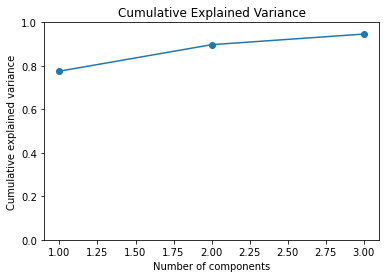

In [5]:
print ("Percent of the variance first 2 describe:", sum(pca.explained_variance_ratio_[0:2]))
print ("Percent of the variance first 3 describe:", sum(pca.explained_variance_ratio_[0:3]))

plt.plot(range(1,pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'-o')
plt.title ('Cumulative Explained Variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.ylim(0,1)
plt.show()

##### 4. Plot the scores-loadings graph for PC1-PC2. Visualize the different sites with a different colour or symbol.

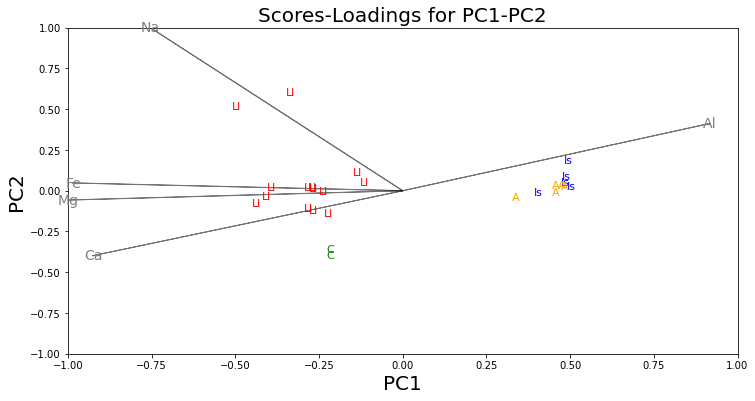

In [6]:
plt.figure(figsize=(12,6))

# Scores: scale PC1-PC2 to (-1,1)
xt = PC_scores[:,:2][:,0]
yt = PC_scores[:,:2][:,1]
xt_scaled = xt / (xt.max() - xt.min())
yt_scaled = yt / (yt.max() - yt.min())

score_labels=pottery_clean.index # Label: site

# Visualize the different sites with a different colour and symbol(abbreviation) 
for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T, score_labels):
    if label == 'AshleyRails':
        plt.text(x, y, 'A', ha='center', size=11, color = 'orange')
    elif label == 'Caldicot':
        plt.text(x, y, 'C', ha='center', size=11, color = 'g')
    elif label == 'IsleThorns':
        plt.text(x, y, 'Is', ha='center', size=11, color = 'b')
    else:
        plt.text(x, y, 'Ll', ha='center', size=11, color = 'r')
            

# Loading: scale PC1-PC2 to (-1,1)
n = loadings_pd.shape[0]
p = loadings_pd.iloc[:,:2]
p_scaled = MaxAbsScaler().fit_transform(p)

loading_labels=loadings_pd.index # Label: raw material

# Visualize the direction of raw material 
for i in range(n):
    plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'black',alpha = 0.5)
    plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'grey', ha = 'center', va = 'center', size=14)

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title ('Scores-Loadings for PC1-PC2', fontsize=20)
plt.xlabel("PC{}".format(1), fontsize=20)
plt.ylabel("PC{}".format(2), fontsize=20)
plt.show()

##### 5. How does the map of scores-loadings explains the reason that your company uses the raw material from Isle Thorns and Ashley Rails to manufacture Product B?

    From the plot of scores-loading, samples from Isle Thorns and Ashley Rails are close to each other, illustrates the sample from those two sites are correlated and have similar properties:
    1. Both contain high concentration of AI (Aluminum)
    2. Both contain low concentration of Ca-Fe-Mg-Na than averagr  

##### 6. Is the raw material from Caldicot a good replacement for Llanedyrn? Yes or no and why?
    No, samples from Caldicot is not a good replacement for Llanedyrn although the samples from Caldicot close to the majority of samples from Llanedyrn. 
    The two samples in the top left indicates high concentration of Na, but the samples from Caldicot have almost average concentration of Na. 
    


##### 7. What are the biggest differences in the two big clusters? How are the two samples from the candidate Caldicot different than the Llanedyrn samples?
    One big clusters include the samples from Isle Thorns and Ashley Rails, they contain high concentration of AI, but low concentration of Ca-Na-Fe-Mg. On the other big cluster include the samples from Llanedyrn has opposite concentration distribution. 

    The samples from Llanedyrn have higher concentration of Na than average, but the samples from Caldicot have approximately average concentration of Na. 

##### 8. Confirm the answers by producing the boxplot of the 5 variables grouped by the site of the raw material shown below.

    1. Product B: raw material from Isle Thorns and Ashley Rails have close average concentration of Al-Fe-Mg-Ca-Na
    2. Product A: samples from Caldicot is not a good replacement for Llanedyrn, it has obviously higher concentration of Ca, lower concentration of Fe-Na. 
    

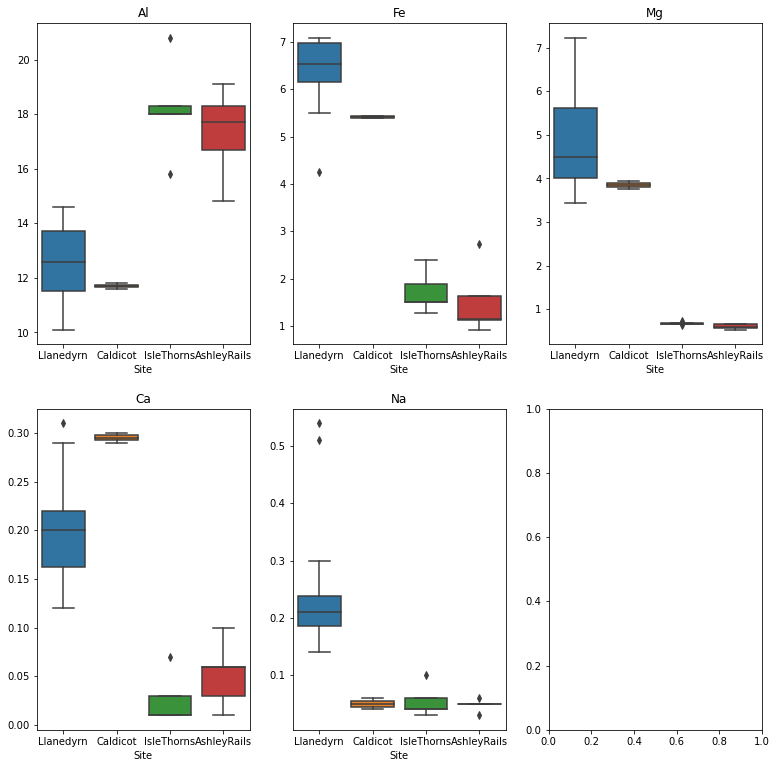

In [7]:
fig, axs = plt.subplots(2, 3,figsize=(13, 13))   

sns.boxplot(ax=axs[0,0],x="Site", y='Al', data=pottery).set(title='Al', ylabel='') 
sns.boxplot(ax=axs[0,1],x="Site", y='Fe', data=pottery).set(title='Fe', ylabel='') 
sns.boxplot(ax=axs[0,2],x="Site", y='Mg', data=pottery).set(title='Mg', ylabel='') 
sns.boxplot(ax=axs[1,0],x="Site", y='Ca', data=pottery).set(title='Ca', ylabel='') 
sns.boxplot(ax=axs[1,1],x="Site", y='Na', data=pottery).set(title='Na', ylabel='') 

plt.show()

##### Final note: 
In this problem, we reduced the number of variables from 5 to 2 in order
to visualize the characteristics captured in the 5 variables. With more than 5 variables you
realize that it becomes diffcult to visualize and compare the different samples. Dimension
reduction methods like PCA are crucial to understand multivariate data. Conventional
statistical analysis like the boxplot shown here do not show the correlations between the
variables which are simply captured in the PCA plots you created.

## 

## 2 Batch data analysis

In this problem, we will look into batch data; dynamic time-series of a finite duration. Batch
manufacturing processes are very common in chemical, pharma, bioengineering and semi-
conductor industries such as baker's yeast production, beer brewing and vaccines production.

In theory, a reactor is designed with temperature, pressure, level, pH control and multiple
sensors that measure these variables among others. A perfect batch (again in theory) is one
that is tightly controlled to the specifications and as a result the productivity and quality of
the final product is optimized.

In real life, a typical batch is run from a few hours up to a week or two and a lot of things
can go wrong during this period. There is always variability either because the process is
very sensitive to minor uctuations in some variables or the control of some variables failed for a period of time.

In a company that implements Data Analytics or Multivariate Statistical Process Control
(MSPC) monitoring is typically implemented with the following steps:

1. Identify a number of reference, perfect historical batches (15-20), both in terms of high productivity/quality and minimum anomalies or uctuations around the setpoints.
2. Create a PCA model of the perfect batches identified. This is your model.
3. Every time your site is running a new batch, fit your data online or as soon as your data infrastructure allows you to do so. Fitting will tell you whether your batch is similar to the perfect batches or it is deviating from the reference behaviour.

Next, you will follow these steps to build a Batch Statistical Process Control and implement
it to monitor a new batch (we will assume that you got the data at the end of the batch
and fitt them to the model). The dataset is from a baker's yeast production facility in Solna,
Sweden capturing the last step of the fermentation.


### 2.1 Build a Batch Statistical Process Control model

##### 1. Import the data from 'bakers yeast reference batches.xlsx'. Identify how many batches are in the data. What is the duration of each batch and how many data points are there per batch? How many variables are measured (including time)?

    1. Identify how many batches are in the data: 16
    ['hb', 'kb', 'eb', 'Ta', 'cb', 'gb', 'jb', 'Va', 'lb', 'bb', 'ib', 'db', 'Ma', 'Na', 'fb', 'Xa'] 
    
    2. What is the duration of each batch: 13.6667
    and how many data points are there per batch: 83
    
    3. How many variables are measured (including time): 8
    ['Molasses flow', 'Level', 'pH', 'Temperature', 'Time', 'Ethanol', 'NH3 flow', 'Air flow']

In [8]:
# Import the data
batch = pd.read_excel('bakers_yeast_reference_batches.xlsx')
batch_type = list(set(batch['BatchID']))
 
# Drop unnecessary columns and reset index
batch_clean = batch.drop(["Unnamed: 0","Primary ID"], axis=1)
batch_clean.set_index("BatchID", inplace=True)

##### 2. Plot the variables time-profiles in a 2x4 subplot. Inspect the graphs (don't just plot them). Look for potential outliers. Which variables have the largest variability? Which variables are tightly controlled?
    Which variables have the largest variability: Molasses flow, Air flow
    Which variables are tightly controlled: Ethanol, pH
    (large y range indicates large  variability) 

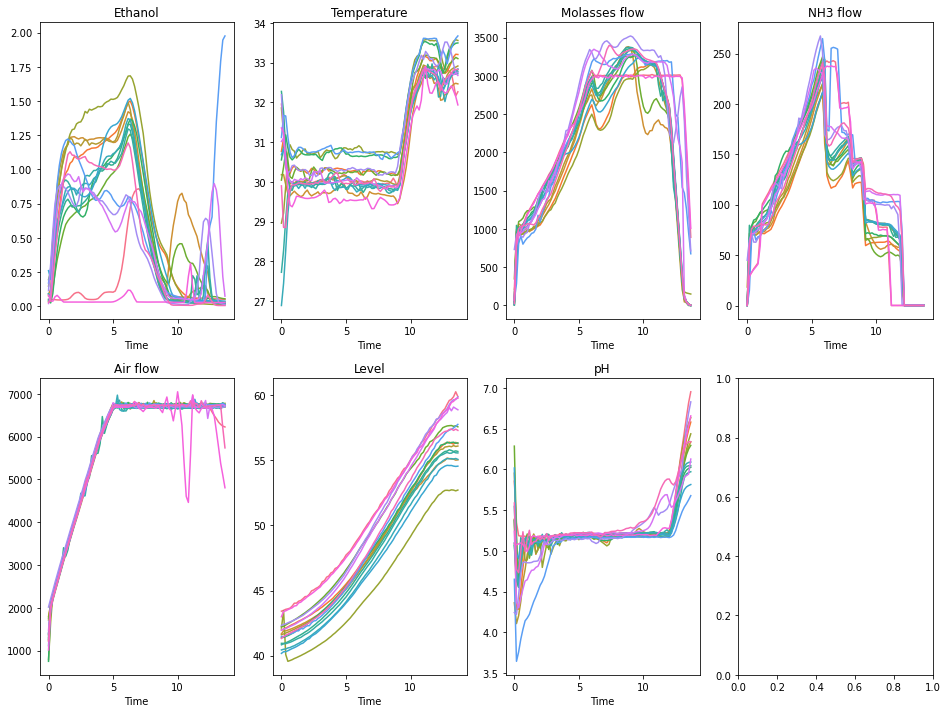

In [9]:
fig, axs = plt.subplots(2, 4,figsize=(16, 12))   

sns.lineplot(ax=axs[0,0], x="Time", y= 'Ethanol', data=batch_clean, hue='BatchID',legend= False).set(title='Ethanol',ylabel='')
sns.lineplot(ax=axs[0,1], x="Time", y='Temperature', data=batch_clean, hue='BatchID',legend= False).set(title='Temperature',ylabel='')
sns.lineplot(ax=axs[0,2], x="Time", y='Molasses flow', data=batch_clean, hue='BatchID',legend= False).set(title='Molasses flow',ylabel='')
sns.lineplot(ax=axs[0,3], x="Time", y='NH3 flow', data=batch_clean, hue='BatchID',legend= False).set(title='NH3 flow',ylabel='')
sns.lineplot(ax=axs[1,0], x="Time", y='Air flow', data=batch_clean, hue='BatchID',legend= False).set(title='Air flow',ylabel='')
sns.lineplot(ax=axs[1,1], x="Time", y='Level', data=batch_clean, hue='BatchID',legend= False).set(title='Level',ylabel='')
sns.lineplot(ax=axs[1,2], x="Time", y='pH', data=batch_clean, hue='BatchID',legend= False).set(title='pH',ylabel='')

plt.show()

##### 3. Select the features (including the Time column), pre-process the data and perform PCA with 5 principal components. Extract the scores and loadings.
    X = TP'
    X dimension: (1328, 8)
    T dimension: (1328, 5)
    P dimension: (8, 5)

In [10]:
# Standardize data
scaler = StandardScaler()
batch_scaled = scaler.fit_transform(batch_clean)

In [11]:
# perform PCA with 5 PCs
pca = PCA(n_components=5, svd_solver='full')

# Extract the scores
PC_scores = pca.fit_transform(batch_scaled)
scores_pd = pd.DataFrame(data = PC_scores
                         ,columns = ['PC1', 'PC2', 'PC3','PC4','PC5']
                         ,index = batch_clean.index)

# Extract the loadings
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5']
                           ,index = batch_clean.columns)

##### 4. In order to plot the scores-loading plot, you need to pivot the scores BatchID with index 'Time' (use pandas pivot table). 

In [12]:
# Add column 'Time'
scores_pd['Time'] = batch_clean['Time']

# pivot the scores BatchID with index 'Time'
scores_pivot = scores_pd.pivot_table(index=['Time'],columns=['BatchID'])
scores_pivot

PC1                                                    \
BatchID          Ma        Na        Ta        Va        Xa        bb   
Time                                                                    
0.000000  -2.575226 -2.494768 -1.834810 -1.935067 -1.953438 -0.808176   
0.166667  -3.406333 -2.944182 -2.731785 -1.704701 -3.044833 -1.303347   
0.333333  -3.390333 -3.070940 -3.117042 -1.841620 -3.172201 -1.630004   
0.500000  -3.534499 -2.888284 -3.194946 -2.016330 -2.751431 -1.790453   
0.666667  -3.596972 -2.732277 -3.165646 -2.107667 -2.436144 -1.811100   
...             ...       ...       ...       ...       ...       ...   
13.000000  2.489762  4.277071  3.184812  4.033208  3.772295  4.373225   
13.166700  2.481818  4.552587  3.157697  4.097282  3.875235  4.485736   
13.333300  2.421492  4.641010  3.372776  4.055942  3.963794  4.556764   
13.500000  2.397535  4.702980  3.579729  4.048033  3.900935  4.617689   
13.666700  2.442108  4.826890  3.850841  3.985137  3.808085  4.695344   

                                                   ...       PC5            \
BatchID          cb        db        eb        fb  ...        cb        db   
Time                                               ...                       
0.000000  -1.732160 -1.483465 -2.607604 -2.574646  ... -0.132314  0.132039   
0.166667  -2.818163 -2.245863 -3.134312 -3.146375  ... -0.526101  0.060107   
0.333333  -3.018590 -3.095891 -3.340362 -3.181104  ... -0.346720  0.127723   
0.500000  -2.938017 -3.043336 -3.349177 -2.775636  ... -0.083581  0.355656   
0.666667  -2.735993 -2.909978 -3.199772 -2.511582  ...  0.060130  0.456512   
...             ...       ...       ...       ...  ...       ...       ...   
13.000000  3.610527  3.231240  3.730375  3.293611  ... -0.289543 -0.039956   
13.166700  3.812695  3.385515  3.900761  3.531415  ... -0.436381 -0.158290   
13.333300  4.008694  3.523197  4.035689  3.730366  ... -0.528557 -0.196414   
13.500000  4.187002  3.613033  4.143437  3.877819  ... -0.574028 -0.223224   
13.666700  4.289330  3.696612  4.246451  3.984240  ... -0.582936 -0.218157   

                                                                       \
BatchID          eb        fb        gb        hb        ib        jb   
Time                                                                    
0.000000  -0.617059  0.897800  0.128482  0.009076 -0.914290  1.438659   
0.166667  -0.570277  0.552050 -0.165896 -0.371143 -1.111206  0.774914   
0.333333  -0.087732  0.075650 -0.462843 -0.755104 -0.431340  0.456887   
0.500000   0.197882 -0.306487 -0.344080 -0.594513 -0.052315  0.199308   
0.666667   0.370031 -0.384769 -0.106633 -0.404393  0.123296  0.218693   
...             ...       ...       ...       ...       ...       ...   
13.000000 -0.292699 -0.656136 -0.236875 -0.491489 -0.158960 -0.126855   
13.166700 -0.372398 -0.775162 -0.341100 -0.588635 -0.269508 -0.242682   
13.333300 -0.404784 -0.839552 -0.399807 -0.637534 -0.309537 -0.286531   
13.500000 -0.430634 -0.870686 -0.438777 -0.664983 -0.323551 -0.338967   
13.666700 -0.446849 -0.863928 -0.430286 -0.667053 -0.351098 -0.322251   

                               
BatchID          kb        lb  
Time                           
0.000000   1.833015 -0.111854  
0.166667   1.236314 -0.332924  
0.333333   0.850361 -0.270976  
0.500000   0.471139 -0.038183  
0.666667   0.224946  0.038438  
...             ...       ...  
13.000000 -0.147775 -0.175886  
13.166700 -0.292980 -0.289735  
13.333300 -0.326307 -0.334636  
13.500000 -0.322784 -0.355440  
13.666700 -0.327004 -0.367125  

[83 rows x 80 columns]

##### 5. Plot the scores-loadings plot with one line per batch (this is why the pivot in the previous step was needed). The output should look similar to the plot below. You may choose a different scaling, but the trend should be the same as this graph.

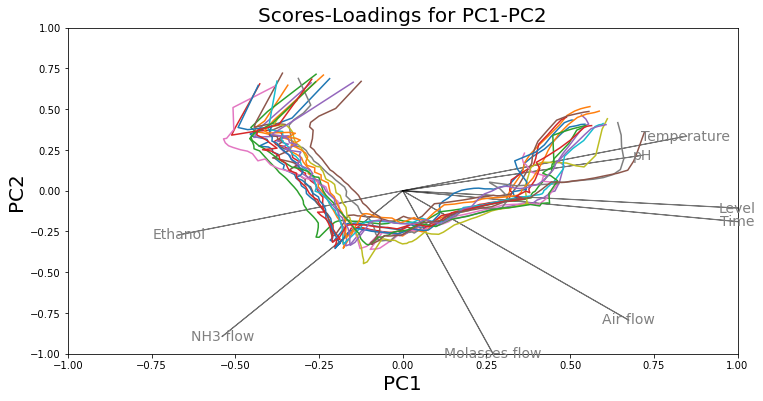

In [13]:
plt.figure(figsize=(12,6))

for i in batch_type:
    
    # Scores: scale PC1-PC2 to (-1,1)
    xt = np.array(scores_pivot['PC1'][i])
    yt = np.array(scores_pivot['PC2'][i])
    xt_scaled = xt / (xt.max() - xt.min())
    yt_scaled = yt / (yt.max() - yt.min())
    
    # Visualize the different batch with a different colour 
    plt.plot(xt_scaled, yt_scaled)
    

# Loading: scale PC1-PC2 to (-1,1)
n = loadings_pd.shape[0]
p = loadings_pd.iloc[:,:2]
p_scaled = MaxAbsScaler().fit_transform(p)

loading_labels=loadings_pd.index # Label: raw material

# Visualize the direction of raw material 
for i in range(n):
    plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'black',alpha = 0.5)
    plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'grey', ha = 'center', va = 'center', size=14)

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title ('Scores-Loadings for PC1-PC2', fontsize=20)
plt.xlabel("PC{}".format(1), fontsize=20)
plt.ylabel("PC{}".format(2), fontsize=20)
plt.show()

##### 6. Explain this graph. 

    1. In which quarter do the batches start and end? Start at quadrant 4 and end at quadrant 2
    
    2. What happens at the kink where the direction of the lines changes? The sudden change at the knik refers to different phrases which controls different variables.     
    
    3. Can you tell from this graph which variables do not change in the first phase and which in the second phase?
    For first phase, Molasses flow and Air flow do not change. For second phase, Ethanol, NH3 flow, Temperature and pH do not change. (Here, do not change means small fluctuation)
    

##### 7. Plot the cumulative explained variance. How much variance do the first two principal components capture?
    How much variance do the first two principal components capture: 0.7846737653782883

Percent of the variance first 2 describe: 0.7846737653782883


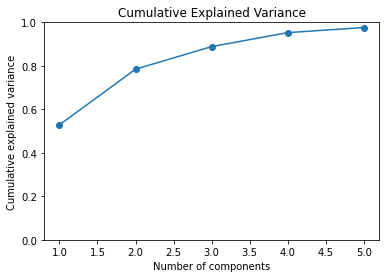

In [14]:
print ("Percent of the variance first 2 describe:", sum(pca.explained_variance_ratio_[0:2]))
 
plt.plot(range(1,pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'-o')
plt.title ('Cumulative Explained Variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.ylim(0,1)
plt.show()

## 2.2 Use the model to monitor running batches

The goal of building an unsupervised model is to monitor the running batches. Your site
runs two reactors in parallel and here you will fit the data from these two reactors to the
model previously built and identify potential problems and outliers.
 

##### 1. Load the data from the file 'todays batches.xlsx' and repeat the same procedure as in the steps 3-4 of the previous section with the exception of the PCA modeling. Here, instead of fit the data to the model and transform, you will only transform them with the model object you created in the previous section.
    X = TP'
    X dimension: (166, 8)
    T dimension: (166, 5)
    P dimension: (8, 5)

In [15]:
# Load the data from the file 'todays batches.xlsx' 
new_batch = pd.read_excel('todays_batches.xlsx')

# Drop unnecessary columns and reset index
new_batch_clean = new_batch.drop(["Unnamed: 0","Primary ID"], axis=1)
new_batch_clean.set_index("BatchID", inplace=True)

In [16]:
# Standardize data (only transform)
new_batch_scaled = scaler.transform(new_batch_clean)

# Extract the scores
new_PC_scores = pca.transform(new_batch_scaled)
new_scores_pd = pd.DataFrame(data = new_PC_scores
                         ,columns = ['PC1', 'PC2', 'PC3','PC4','PC5']
                         ,index = new_batch_clean.index)

# Loadings unchange
loadings_pd 

,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


In [17]:
# Pivot the scores BatchID with index 'Time' 
new_scores_pd['Time'] = new_batch_clean['Time']

new_scores_pivot = new_scores_pd.pivot_table(index=['Time'],columns=['BatchID'])
new_scores_pivot

PC1                 PC2                 PC3            \
BatchID          Ya        Za        Ya        Za        Ya        Za   
Time                                                                    
0.000000  -3.096781 -0.660359  3.798958  4.613764  1.166746 -1.802298   
0.166667  -3.715861 -2.032155  3.216763  2.849667  2.529801  0.423385   
0.333333  -3.928722 -2.734359  2.972255  2.229773  1.411527  1.511814   
0.500000  -4.362027 -2.523621  1.145315  2.247428 -0.230988  0.916732   
0.666667  -4.476710 -2.356751  1.268811  2.592231 -2.409623  0.100159   
...             ...       ...       ...       ...       ...       ...   
13.000000  1.684309  4.177559  1.398034  2.589581 -1.259476 -2.097027   
13.166700  1.770673  4.329929  1.426290  2.726441 -1.244740 -2.361650   
13.333300  1.869276  4.401519  1.470466  2.857172 -1.198562 -2.506579   
13.500000  1.932977  4.462603  1.699221  2.853649 -1.276991 -2.596933   
13.666700  1.646827  4.510675  2.394997  2.868612 -1.234926 -2.633580   

                PC4                 PC5            
BatchID          Ya        Za        Ya        Za  
Time                                               
0.000000   0.602916  2.854773  0.937231 -0.030840  
0.166667  -1.183846  1.492080  0.839431  0.011713  
0.333333  -2.217525 -0.031252  1.037556 -0.072634  
0.500000  -2.807162 -0.437946  1.130690 -0.224712  
0.666667  -3.259502 -0.325745  1.559791 -0.049787  
...             ...       ...       ...       ...  
13.000000 -2.095856  0.924135  0.405520 -0.524341  
13.166700 -1.915758  1.062921  0.421113 -0.615614  
13.333300 -1.773398  1.158278  0.404415 -0.667658  
13.500000 -1.577216  1.205385  0.316969 -0.682489  
13.666700 -1.173403  1.236215  0.343897 -0.672140  

[83 rows x 10 columns]

##### 2. Plot the same scores-loadings plot for the data in the batches you used to develop the model with solid lines. Overlay the new incoming data from the two current batches with dashed lines and two different colours to distinguish them. Also, add a legend for the two batches so that the viewer can distinguish them.

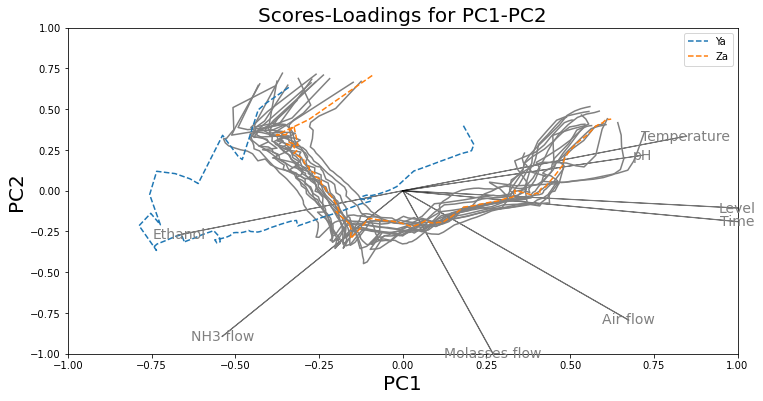

In [18]:
plt.figure(figsize=(12,6))
   
# Plot batches used to develop the model with solid lines
for i in batch_type:  
    # Scores: scale PC1-PC2 to (-1,1)
    xt = np.array(scores_pivot['PC1'][i])
    yt = np.array(scores_pivot['PC2'][i])
    xt_scaled = xt / (xt.max() - xt.min())
    yt_scaled = yt / (yt.max() - yt.min())
    
    # Visualize the different batch with a different colour 
    plt.plot(xt_scaled, yt_scaled, color='grey')

# Overlay two new batches with dashed lines and two different colours to distinguish them
for i in ['Ya', 'Za']:
    xt = np.array(new_scores_pivot['PC1'][i])
    yt = np.array(new_scores_pivot['PC2'][i])

    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt

    plt.plot(xt_scaled, yt_scaled, '--', label = i)
    # Add a legend for the two batches  
    plt.legend()
    
# Loading: scale PC1-PC2 to (-1,1)
n = loadings_pd.shape[0]
p = loadings_pd.iloc[:,:2]
p_scaled = MaxAbsScaler().fit_transform(p)

loading_labels=loadings_pd.index # Label: raw material

# Visualize the direction of raw material 
for i in range(n):
    plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'black',alpha = 0.5)
    plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'grey', ha = 'center', va = 'center', size=14)

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title ('Scores-Loadings for PC1-PC2', fontsize=20)
plt.xlabel("PC{}".format(1), fontsize=20)
plt.ylabel("PC{}".format(2), fontsize=20)
plt.show()

##### 3. Do the batches show behaviour similar to that of the reference ones or there are outliers indicating potential problems?
    Batch Za shows behaviour similar to reference ones.
    Batch Ya is different from referece batches. The scores-loadings plot and dynamic time-series both indicates batch Ya has higher Ethanol, NH3 flow; and lower Temperature, PH, Molasses flow, Air flow, Level.